# Simple Linear Regression

## Preliminaries

In [72]:
import pandas as pd
con = pd.read_csv('Data/ConcreteStrength.csv')
con.rename(columns={'Fly ash': 'FlyAsh', 'Coarse Aggr.': "CoarseAgg",
                    'Fine Aggr.': 'FineAgg', 'Air Entrainment': 'AirEntrain', 
                    'Compressive Strength (28-day)(Mpa)': 'Strength'}, inplace=True)
con['AirEntrain'] = con['AirEntrain'].astype('category')
con.head()

,No,Cement,Slag,FlyAsh,Water,SP,CoarseAgg,FineAgg,AirEntrain,Strength
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,No,34.990
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,Yes,32.272
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,Yes,35.450
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,No,42.080
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,No,26.820


## Linear regression with a single explanatory variable
There are many ways to do linear regression in Python.  We have already used the heavyweight Statsmodels library, so we will continue to use it here.  It has much more functionality than we need, but it provides nicely-formatted output similar to SAS Enterprise Guide.

The method we will use to create linear regression models in the Statsmodels library is `OLS()`.  OLS stands for "ordinary least squares", which means the algorithm finds the best fit line my minimizing the squared residuals (this is "least squares").  The "ordinary" part of the name gives us the sense that the type of linear regression we are seeing here is just the tip of the methodological iceberg.  There is a whole world of non-ordinary regression techniques out there intended to address this or that methodological problem or circumstance.  But since this is a basic course, we will stick with ordinary least squares.

### Preparing the data
Recall the general format of the linear regression equation:
$Y = \beta_0 + \beta_1 X_1 + ... + \beta_n X_n$, where $Y$ is the value of the response variable and $X_i$ is the value of the explanatory variable(s).

If we think about this equation in matrix terms, we see that _Y_ is a 1-dimensional matrix: it is just a single column (or array or vector) of numbers.  In our case, this vector corresponds to the compressive strength of different batches of concrete measured in megapascals.  The right-hand side of the equation is actually a 2-dimensional matrix: there is one column for our _X_ variable and another column for the constant.  We don't often think about the constant as a column of data, but the Statsmodels library does, which is why we are talking about it.

Creating a linear regression model in Statsmodels thus requires the following steps:
1. Import the Statsmodels library
2. Define _Y_ and _X_ matrices.  This is optional, but it keeps the `OLS()` call easier to read
3. Add a constant column to the _X_ matrix
4. Call `OLS()` to define the model
5. Call `fit()` to actually estimate the model parameters using the data set (fit the line)
6. Display the results

Let's start with the first three steps:

In [73]:
import statsmodels.api as sm
Y = con['Strength']
X = con['FlyAsh']
X.head()

0    105.0
1    191.0
2    191.0
3    190.0
4    144.0
Name: FlyAsh, dtype: float64

We see above that _X_ is a single column of numbers (amount of fly ash in each batch of concrete).  The numbers on the left are just the Python index (very row in a Python array has a row number, or index).

### Adding a column for the constant

We can add another column for the regression constant using Statsmodels `add_constant()` method:

In [74]:
X = sm.add_constant(X)
X.head()

,const,FlyAsh
0,1.0,105.0
1,1.0,191.0
2,1.0,191.0
3,1.0,190.0
4,1.0,144.0


Notice the difference: the _X_ matrix has been augmented with a column of 1s called "const".  To see why, recall the point of linear regression: to use data to "learn" the parameters of the best-fit line and use the parameters to make predictions.  The parameters of a line are its _y_-intercept and slope.  Once we have the _y_-intercept and slope ($\beta_0$ and $\beta_1$ in the equation above or _b_ and _m_ in grade 9 math), we can multiply them by the data in the _X_ matrix to get a prediction for _Y_.

Written out in words for the first row of our data, we get:
Concrete strength estimate = $\beta_0$ x 1 + $\beta_1$ x 105.0

The "const" column simply provides a placeholder&mdash;a bunch of 1s to multiply the constant by.  So now we understand why we have to run `add_constant()`.

### Running the model

In [75]:
model = sm.OLS(Y, X, missing='drop')
model_result = model.fit()
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Strength   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     19.98
Date:                Tue, 07 Apr 2020   Prob (F-statistic):           2.05e-05
Time:                        10:37:09   Log-Likelihood:                -365.58
No. Observations:                 103   AIC:                             735.2
Df Residuals:                     101   BIC:                             740.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.2764      1.691     15.543      0.000      22.923      29.630
FlyAsh         0.0440      0.010      4.470      0.000       0.024       0.064
==============================================================================
Omnibus:                        5.741   Durbin-Watson:                   1.098
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                2.716
Skew:                           0.064   Prob(JB):                        0.257
Kurtosis:                       2.215   Cond. No.                         346.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This output look very similar to what we have seen before.

<div class="alert alert-block alert-info">
    <B>Hint:</B>
    There is no missing data in the bank data set, so the <CODE>missing='drop'</CODE> argument above is not required.  However, missing data is a fact of life in most data sets. The simplest way to handle it in linear regression is simply to censor (drop) all rows with missing data from the linear regression procedure.  This is what I have done above.
<div>

## Regression diagnostics
Like R, Statsmodels exposes the residuals.  That is, keeps an array containing the difference between the observed values _Y_ and the values predicted by the linear model.  A fundamental assumption is that the residuals (or "errors") are random: some big, some some small, some positive, some negative, but overall, the errors are normally distributed around a mean of zero.  Anything other than normally distributed residuals indicates a serious problem with the linear model.

## Histogram of residuals
Plotting residuals in Seaborn is straightforward: we simply pass the `distplot()` method the array of residuals.  Below I have included the kernel density plot and this best-fit normal plot for reference.  We can see that the residuals are close to normal.

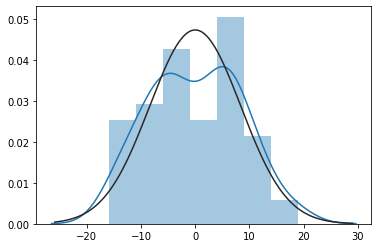

In [76]:
import seaborn as sns
from scipy import stats
sns.distplot(model_result.resid, fit=stats.norm);

## Boxplot of residuals
A boxplot is often better when the residuals are highly non-normal.  Here we see a reasonable distribution with the mean close to the median (indicating symmetry).

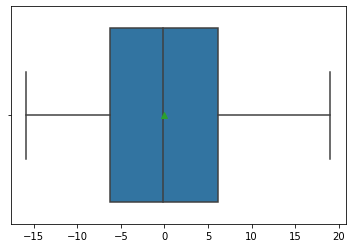

In [77]:
sns.boxplot(model_result.resid, showmeans=True);

## Q-Q plot

A Q-Q plot is a bit more specialized than a histogram or boxplot, so the easiest thing is to use the regression diagnostic plots provided by Statsmodels.  How did I know Statsmodels has regression diagnostic plots?  I Googled it.  These plots are not as attractive as the Seaborn plots, but they are intended primarily for the data analyst.  I think it is safe to assume that high-level decision makers will _not_ be asking for Q-Q plots.

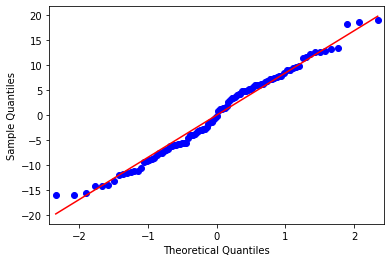

In [78]:
sm.qqplot(model_result.resid, line='s');

## Fit plot
A fit plot shows predicted values of the response variable versus actual values of _Y_.  If the linear regression model is perfect, the predicted values will exactly equal the observed values and all the data points in a predicted versus actual scatterplot will fall on the 45&deg; diagonal.

The fit plot provided by Statsmodels is okay in the sense that it gives a rough sense of the quality of the model.  Since the $R^{2}$ of this model is only 0.165, it should come as no surprise that the fit model is not particularly good.

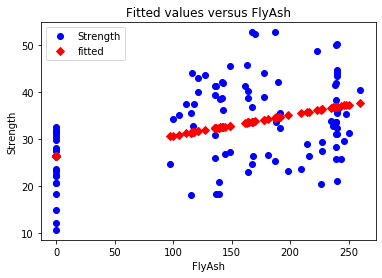

In [79]:
sm.graphics.plot_fit(model_result,1, vlines=False);

## Fit plot in seaborn
As in R, creating a better fit plot is a bit more work.  The central issue is that the observed and predicted axis must be identical for the reference line to be 45&deg;.  To achieve this, I do the following below:
1. Determine the min and max values for the observed values of _Y_
2. Predict values of _Y_
3. Create a plot showing the observed versus predicted values of _Y_. Save this to an object (in my case `ax`)
4. Modify the chart object so that the two axes share the same minimum and maximum values
5. Generate data on a 45&deg; line and add the reference line to the plot

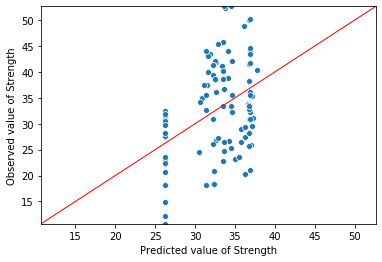

In [80]:
import matplotlib.pyplot as plt
import numpy as np

Y_max = Y.max()
Y_min = Y.min()

ax = sns.scatterplot(model_result.fittedvalues, Y)
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(Y_min, Y_max))
ax.set_xlabel("Predicted value of Strength")
ax.set_ylabel("Observed value of Strength")

X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()